In [34]:
import numpy as np
from scipy import ndimage
from scipy.ndimage.filters import laplace as laplace
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.io import imread, imsave


def gauss(x, y, mux, muy, sigmax, sigmay):
    sigma2 = sigmax*sigmay
    return 1.0/np.sqrt(2*np.pi*sigma2) * np.exp( -0.5*(x-mux)**2/(sigmax**2) - 0.5*(y-muy)**2/(sigmay**2) )



In [36]:
pos = np.fromfile(open('pos.np','rt'), sep=',')
mxll = np.fromfile(open('mxll.np','rt'), sep=',')
ll = np.fromfile(open('ll.np','rt'), sep=',')
llself = np.fromfile(open('llself.np','rt'), sep=',')
roi1 = np.fromfile(open('roi1.np','rt'), sep=',')
roi2 = np.fromfile(open('roi2.np','rt'), sep=',')
roi2_shifted = np.fromfile(open('roi2_shifted.np','rt'), sep=',')


In [ ]:
piv = np.genfromtxt(open('/Users/timrudge/AndreaRavasioData/PIV roi velocity text/OVCA429_20160414_06_%02d.txt'%20), delimiter=',')
print(len(piv))
pivgridvel = np.zeros((1000/64+1,1000/64+1,2))
pivgridpos = np.zeros((1000/64+1,1000/64+1,2))
count = np.zeros((1000/64+1,1000/64+1))
for i in range(len(piv)):
    idxx,idxy = (piv[i,0]-8)/64, (piv[i,1]-8)/64
    count[idxx,idxy] += 1
    pivgridpos[idxx,idxy,0] += piv[i,0]
    pivgridpos[idxx,idxy,1] += piv[i,1]
    pivgridvel[idxx,idxy,0] += piv[i,2]
    pivgridvel[idxx,idxy,1] += piv[i,3]
    
pivgridpos[:,:,0] = pivgridpos[:,:,0]/count
pivgridpos[:,:,1] = pivgridpos[:,:,1]/count
pivgridvel[:,:,0] = pivgridvel[:,:,0]/count
pivgridvel[:,:,1] = pivgridvel[:,:,1]/count
pivgridpos[np.isnan(pivgridpos)] = 0
pivgridvel[np.isnan(pivgridvel)] = 0

plt.figure(figsize=(12,12))
im = plt.imread('/Users/timrudge/AndreaRavasioData/masked image/%02d.tif'%20).astype(np.float32)
plt.imshow(im)
plt.quiver(pivgridpos[:,:,0],pivgridpos[:,:,1], pivgridvel[:,:,0], pivgridvel[:,:,1])

plt.figure()
plt.axis('equal')
plt.quiver(pivgridpos[:,:,0],pivgridpos[:,:,1], pivgridvel[:,:,0], pivgridvel[:,:,1])
plt.imshow(im)
#plt.quiver(piv[:,0], piv[:,1], piv[:,2], piv[:,3])


In [37]:
print(pos.shape)
print(ll.shape)
print(roi1.shape)
np.real(90000/2/2)

(10800,)
(1215000,)
(22118400,)


array(22500)

In [41]:
gx,gy = 18,30
vv = 15
wx,wy = 64,64
nt = 10

x = np.arange(-vv/2,vv/2)
vy,vx = np.meshgrid(x,x)

pos = pos.reshape((gx,gy,nt,2))

mxll = mxll.reshape((gx,gy,nt))
ll = ll.reshape((gx,gy,nt,vv,vv))
llself = llself.reshape((gx,gy,nt,vv,vv))
roi1 = roi1.reshape((gx,gy,nt,wx,wy))
roi2 = roi2.reshape((gx,gy,nt,wx,wy))
roi2_shifted = roi2_shifted.reshape((gx,gy,nt,wx,wy))


[[ 648.          776.        ]
 [ 647.00488065  777.69733125]
 [ 648.15789146  778.85329084]
 [ 646.16663265  779.15294787]
 [ 646.50844091  780.99184864]
 [ 648.3106024   781.97438261]
 [ 648.496307    783.80804721]
 [ 646.84423641  786.14952501]
 [ 647.61248676  789.20718008]
 [ 647.00703461  793.7135547 ]]


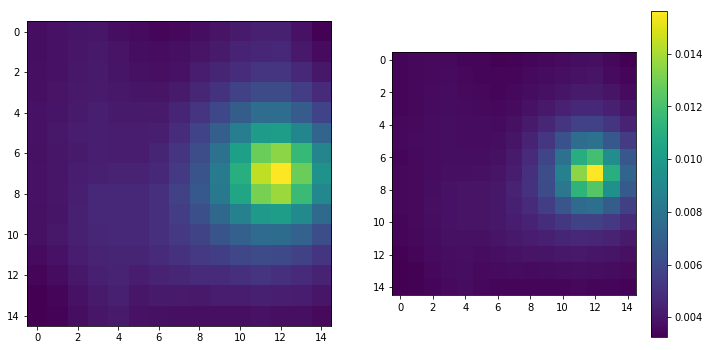

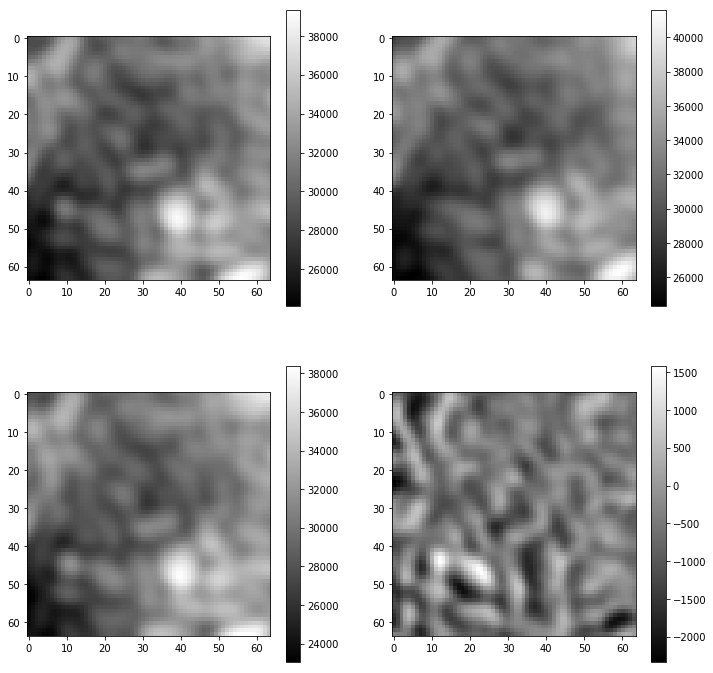

In [50]:
ix,iy,it = 10,12,-1

print(pos[ix,iy,:,:])
#print(pos[ix,iy,it-1,:])

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
H = ll[ix,iy,it,:,:]
plt.imshow(H)


#plt.colorbar()
#plt.plot(pos[ix,iy,it,1]-pos[ix,iy,it-1,1]+7, pos[ix,iy,it,0]-pos[ix,iy,it-1,0]+7, 'rx')
#plt.plot(pivgridvel[ix,iy,0]/15+7, pivgridvel[ix,iy,1]/15+7, 'go')

#dHdy,dHdx = np.gradient(H)
#plt.quiver(-dHdx,dHdy)



plt.subplot(1,2,2)
Hself = -llself[ix,iy,it,:,:]
eH = np.exp(H-Hself)
plt.imshow(eH/np.sum(eH))
plt.colorbar()

plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.imshow(roi1[ix,iy,it,:,:], cmap='gray')
plt.colorbar()

plt.subplot(2,2,2)
plt.imshow(roi2[ix,iy,it-3,:,:], cmap='gray')
plt.colorbar()


plt.subplot(2,2,3)
plt.imshow((roi2_shifted)[ix,iy,it,:,:], cmap='gray')
plt.colorbar()

plt.subplot(2,2,4)
plt.imshow((roi2_shifted-roi1)[ix,iy,it,:,:], cmap='gray')
plt.colorbar()


(array([ 1858.,    64.,  1002.,  1387.,   702.,   266.,    84.,    24.,
            9.,     4.]),
 array([ 0.        ,  0.30969901,  0.61939802,  0.92909702,  1.23879603,
         1.54849504,  1.85819405,  2.16789305,  2.47759206,  2.78729107,
         3.09699008]),
 <a list of 10 Patch objects>)

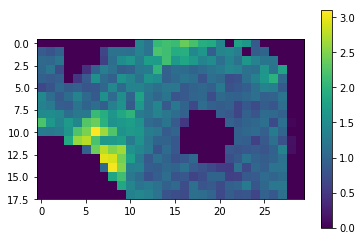

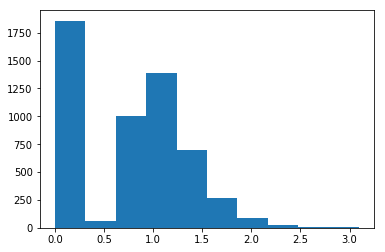

In [45]:

plt.figure()
#plt.plot(-mxll.reshape((gx*gy,nt)).transpose())
plt.imshow(-mxll[:,:,-1])
plt.colorbar()

plt.figure()
plt.hist(-mxll.reshape((gx*gy*nt)))

334.899279957
6.64947650083
5.02358748932
4.13668845595
4.96795617993
5.56532215779
6.76768984827
7.50073696625
5.72823500049
6.6034841812
6.62512501805
6.8191911132
7.66961213139
7.74764667509
6.23867376367
7.4594676372
7.3747636022
6.20038210573
6.29635774082
5.23440501156
6.82606829194
7.04046443407
6.86186121793
6.1044448007
6.42578930282
6.96931435273
6.61008345522
7.08747448105
5.33695160914
6.06948729085
7.39595812181
5.17955364492
5.37316083418
5.94597112327
5.41202406649
5.57670388949
4.06362388197
4.19071141569
5.84582098721
5.32409261426
5.97311309717
5.38897358334
5.50229917048
6.03021837513
6.04898154528
7.41885144121
4.94253747565
4.69882533921
4.24411052431
4.31901430731
4.3791607061
4.83676930849
5.63827559801
4.73486863307
5.90291116657
3.9427779001
4.47242918682
4.28262888867
5.74677837616
4.88214504915
6.62041571426
4.49740908646
3.77732101641
4.22737871568
3.27098176881
4.42130431596
3.70958143435
3.79003173592
4.81425109808
4.69208938905
3.4555592172
4.240342993
4.

(-0.5, 1919.5, 1199.5, -0.5)

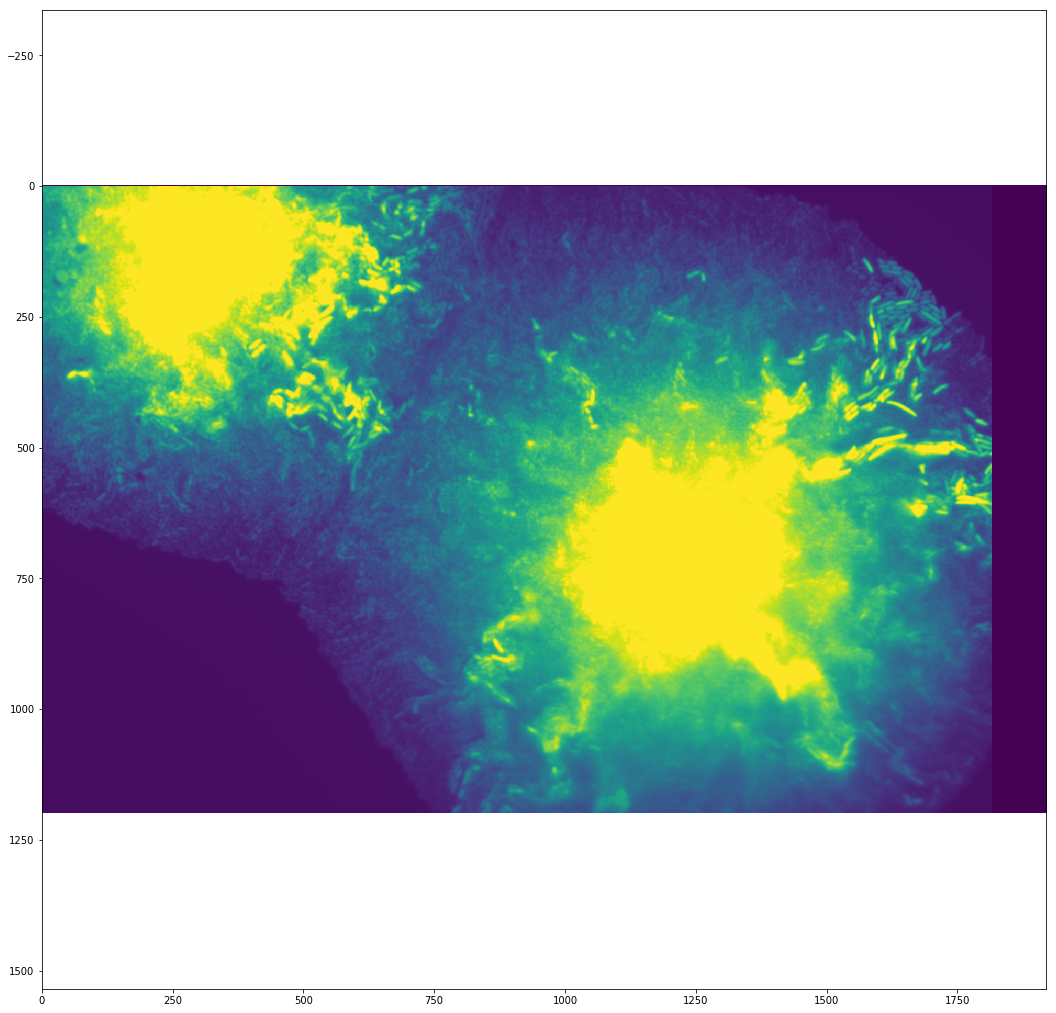

In [33]:
plt.figure(figsize=(18,18))
p = np.reshape(pos, (gx*gy,nt,2))
for it in range(nt):
    fname = '/Users/timrudge/CavendishMicroscopy/10.01.16/Pos0000/Frame0/aligned_Frame0000Step%04d.tif'
    im2 = imread(fname%(125+(100-it))).astype(np.float32)
    plt.imshow(im2)
    plt.axis('equal')
    vel = pos[:,:,it,:] - pos[:,:,it-1,:]
    vel = vel - np.mean(vel, axis=(0,1))
    velmag = np.sqrt(np.sum(vel*vel,axis=2))
    print(np.max(vel))
    swx=64
    plt.quiver(swx/2+pos[:,:,it,1], swx/2+pos[:,:,it,0], -vel[:,:,1]/velmag, vel[:,:,0]/velmag, color='r')
    plt.plot(swx/2+pos[:,:,it,1], swx/2+pos[:,:,it,0], 'k.')
    plt.savefig('quiver%04d.png'%it)
    plt.clf()
    
#print np.max(pivgridvel)
#pivvelmag = 4 #np.sqrt(np.sum(pivgridvel*pivgridvel,axis=2))
#plt.quiver(pivgridpos[:,:,0],pivgridpos[:,:,1], pivgridvel[:,:,0]/pivvelmag, pivgridvel[:,:,1]/pivvelmag, color='r')
#plt.plot(pivgridpos[:,:,0], pivgridpos[:,:,1], 'rx')
#plt.quiver(piv[:,0], piv[:,1], piv[:,2]/4, piv[:,3]/4, color='r')
#im1 = plt.imread('/Users/timrudge/AndreaRavasioData/masked image/%02d.tif'%10).astype(np.float32)
#im2 = plt.imread('/Users/timrudge/AndreaRavasioData/masked image/%02d.tif'%20).astype(np.float32)
im2 = imread('/Users/timrudge/CavendishMicroscopy/10.01.16/Pos0000/Frame2/aligned_Frame0002Step%04d.tif'%225).astype(np.float32)

plt.imshow(im2)
plt.axis('equal')

#err = np.sqrt(np.mean((vel-pivgridvel[:-1,:-1,:]/3.5)**2,axis=2))
#err[np.isnan(err)]=0
#plt.figure()
#plt.hist(err[err>0].ravel())
#plt.plot(vel[:,:,1], pivgridvel[:-1,:-1,0], '.')

#plt.figure()
#ll = ll.reshape((17*29,50,15,15))
#plt.imshow(ll[400,1,:,:])
